# 군집분석

In [9]:
# 데이터 가공·처리·분석 라이브러리
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 머신러닝 라이브러리
import sklearn

# 소수점 3자리까지 표시
%precision 3

'%.3f'

군집분석에서 다루는 데이터는 지도학습과 달리 목표변수를 포함하지 않습니다.  즉, 군집분석은 목표변수와 설명변수의 관계를 나타내는 모델을 구축하는 것이 아니라 데이터 자체에 숨겨진 구조와 시사점을 발견하는 모델입니다.

### k-means

* 1단계 : 입력 데이터를 좌표 위에 점으로 표시한다
* 2단계 : 무작위로 세 개의 데이터를 선택하고 좌표 위에 표시한다
* 3단계 : 선택한 각 점을 군집 1, 군집 2, 군집 3의 중심점으로 지정한다
* 4단계 : 입력 데이터의 각 점들을, 앞에서 지정한 세 개의 중심점 중 가장 가까운 것을 선택해, 그 번호를 자신의 군집 소속 군집 번호로 한다. 
* 5단계 : 모든 데이터의 소속 군집이 정해지면 각 군집의 중심(평균)을 계산한다
* 6단계 : 5단계에서 구한 세 개의 중심을 새 군집의 중심점으로 설정한다
* 7단계 : 4단계에서 6단계까지 반복한다. 반복 제한 횟수에 도달하거나 중심점의 이동 거리가 충분히 작아지면 종료한다

KMeans 클래스의 초기화 파라미터(init='random')을 생략하면 k-means++  
k-means++는 k-means의 초기 중심점을 가능한 한 넓은 범위에서 선택하는 방법으로, k-means보다 안정적인 결과를 얻을 수 있습니다.  
(k-means는 초기 중심값을 무작위로 선정하므로 초기 중심점 위치에 편향이 발생할 가능성이 있습니다)  
  
그 밖에도 중심점을 평균(centroid)이 아니라 중앙값(medoid)으로 지정하는 k-medoids도 있습니다. 평균은 데이터에 실제로 존재하지 않는 값이지만 k-medoids는 중앙값을 사용하므로 중심 위치가 가상의 수치가 되는 것을 방지합니다. 또한 이상값의 영향을 덜 받는 것도 장점입니다.

#### 훈련 데이터 생성
make_blobs 함수로 세로축, 가로축에서 표준현차가 1.0인 정규분포를 따르는 난수를 생성합니다. 

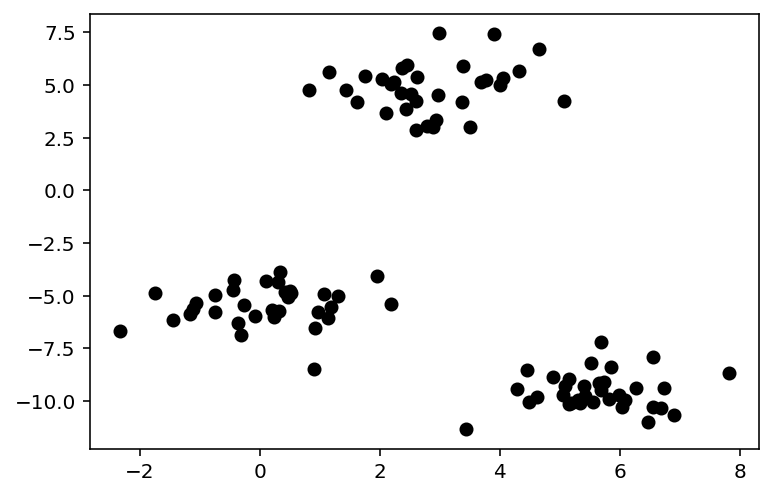

In [10]:
# k-means를 사용하기 위해 임포트
from sklearn.cluster import KMeans

# 데이터를 생성하기 위해 임포트
from sklearn.datasets import make_blobs

# 샘플 데이터 생성
# 주의: make_blobs은 두 개의 값을 반환하므로
# 한쪽은 사용하지 않는 _로 입력 받음
X, _ = make_blobs(random_state=10)

# 그래프 출력
# color 옵션으로 색 지정 가능
plt.scatter(X[:,0],X[:,1],color='black')

#### KMeans 클래스를 이용한 군집분석
먼저 KMeans 클래스를 초기화하고 객체를 만듭니다. 파라미터는 init = 'random', n_clusters = 3으로 설정합니다. init는 클래스 초기화 명령어이고 random으로 설정하면 k-means++가 아니라 k-means 방법을 사용하게 됩니다. n_clusters에는 군집 수를 지정합니다.  
  
KMeans 클래스의 객체를 만든 후 fit 메서드를 실행해 군집의 중심을 계산하고 predict 메서드로 각 데이터의 군집번호를 결정합니다. fit과 predict를 연속적으로 실행하는 fit_predict도 있지만 구축한 모델을 저장해야 할 경우 fit 메서드만 실행하는 것이 좋습니다. 

In [11]:
# KMeans 클래스 초기화
kmeans = KMeans(init='random',n_clusters=3)

# 군집 중심점 계산
kmeans.fit(X)

# 군집번호 예측
y_pred = kmeans.predict(X)

#### 군집분석 결과 확인

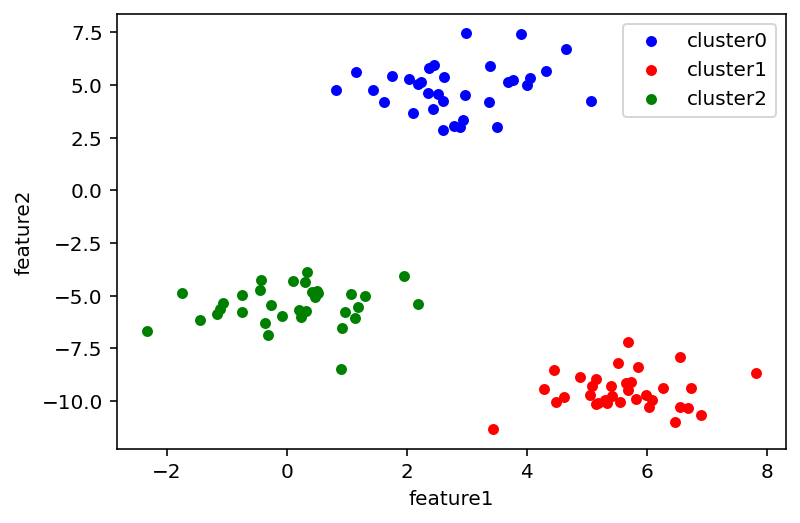

In [12]:
# concat로 데이터를 가로 방향으로 결합(axis=1 지정)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 위의 데이터에 X축을 eature1, Y축을 eature2, 군집번호를 cluster로 컬럼 이름 설정
merge_data.columns = ['feature1','feature2','cluster']

# 군집 결과를 시각화
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                                           label=f'cluster{i}', ax=ax)

### 금융 마케팅 데이터를 이용한 군집분석

#### 분석 대상 데이터 다운로드와 읽어 들이기

In [13]:
# 웹 사이트에서 데이터를 다운로드 한 후 zip 파일 압축을 풀기 위한 라이브러리 임포트
import requests, zipfile
import io

# 데이터가 있는 url 지정
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# 데이터 수집하고 압축을 품
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [14]:
# 데이터 읽어 들이기
bank= pd.read_csv('bank-full.csv', sep=';')

# 처음 다섯 행 데이터 출력
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


zip 파일에 포함된 bank-names.txt에 각 변수에 관한 설명이 있습니다. Input variables가 설명변수, Output variable이 목표변수이지만 실습할 때는 목표변수를 예측하지 않으므로 신경 쓰지 않아도 됩니다.

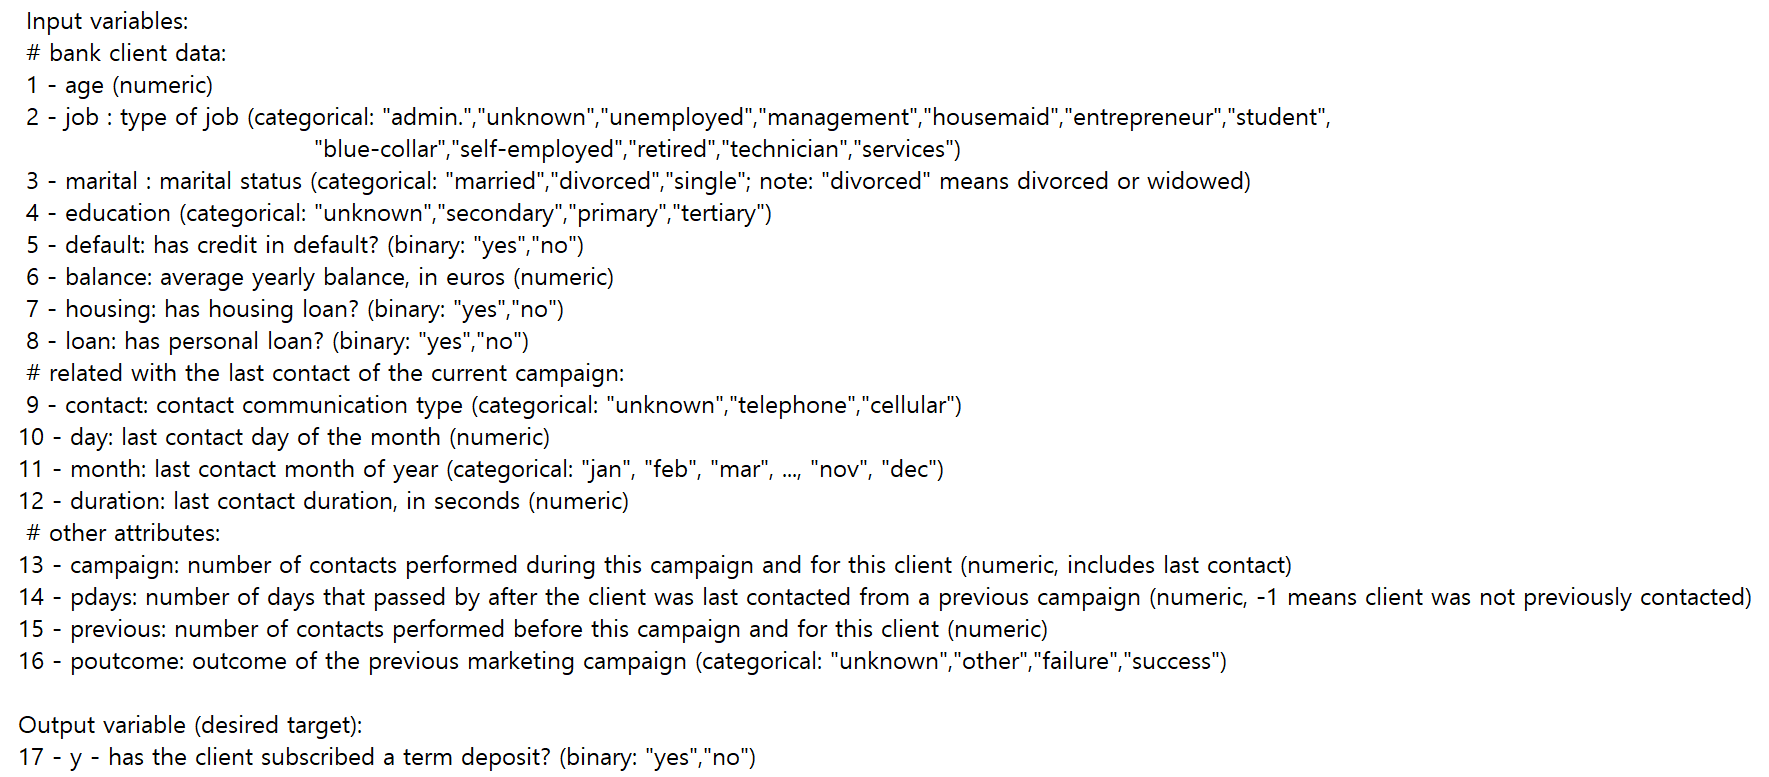

#### 데이터 정리와 표준화

In [15]:
print('데이터 형식(x,y):{}'.format(bank.shape))
print('결측 값 수:{}'.format(bank.isnull().sum().sum()))

데이터 형식(x,y):(45211, 17)
결측 값 수:0


군집분석을 설명하기 위해 age, balance, campaign, previous 변수만 사용합니다. 변수들의 단위가 다르므로 변수를 표준화하는 전처리 작업을 수행하고, 이렇게 함으로써 단위가 큰 변수에 좌우되지 않도록 합니다.

In [16]:
from sklearn.preprocessing import StandardScaler

# 데이터 컬럼 선택
bank_sub = bank[['age','balance','campaign','previous']]

# 표준화
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


#### 군집 분류

k-means로 군집을 나눕니다. 군집의 수는 6으로 지정합니다. 

0    14406
1    23608
2     3842
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

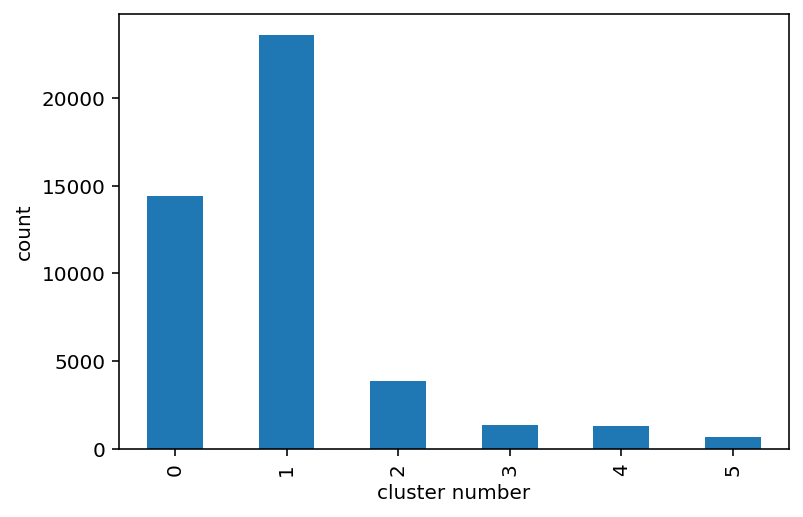

In [17]:
# KMeans 클래스 초기화
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# 군집 중심 계산
kmeans.fit(bank_sub_std)

# 군집 번호를 판다스 Series 객체로 변환
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 군집 번호와 데이터 개수 출력
print(labels.value_counts(sort=False))

# 그래프 출력
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

### 엘보우법으로 군집 수 추정

엘보우법은 군집의 중심점과 군집에 속하는 각 점 간의 거리 총합에 주목합니다. 군집의 수가 1개에서 적절한 수까지 증가하면 각 점도 더 가까운 군집에 속하게 되므로 거리 총합은 군집의 수와 비례해서 감소합니다.  
  
적절한 개수 이상으로 군집의 수가 증가하면 거리의 총합이 감소하는 정도가 완만해집니다. 이렇게 군집 수가 증가함에 따라 중심점과 각 점 사이의 거리 총합이 감소하는 기울기가 급격하게 변하는 지점을 적절한 군집 수로 판단하는 방법이 엘보우법입니다.

앞서 "훈련 데이터 생성" 첫 부분에서 make_blobs 함수로 생성한 데이터 X에 엘보우법을 적용해 보겠습니다.  
거리의 총합은 kMeans 객체 inertia_속성에서 추출합니다.  

Text(0, 0.5, 'Distortion')

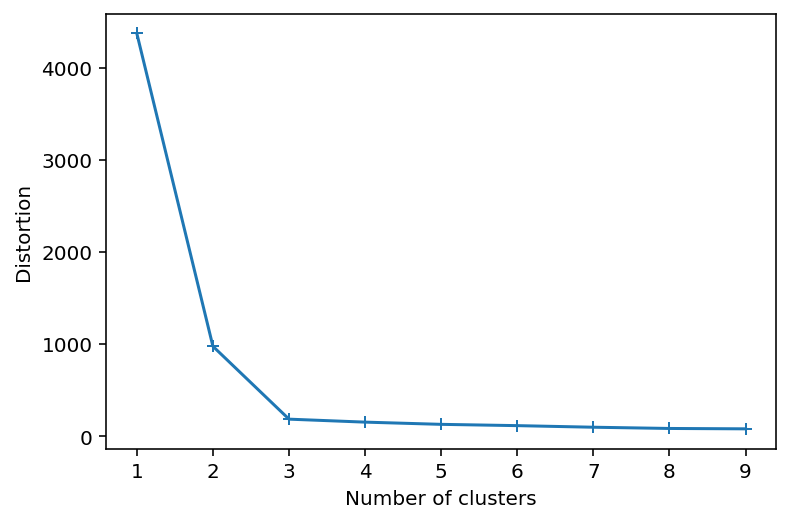

In [18]:
# 엘보우법으로 추정. 군집 수를 1에서 10까지 증가시켜 거리의 종합 계산
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
    
# 그래프 출력
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

금융 기관 마케팅 데이터에도 엘보우법을 적용해 보겠습니다. 군집의 수를 1에서 20까지 증가시키고 거리의 총합을 그래프로 나타냅니다. 

Text(0, 0.5, 'Distortion')

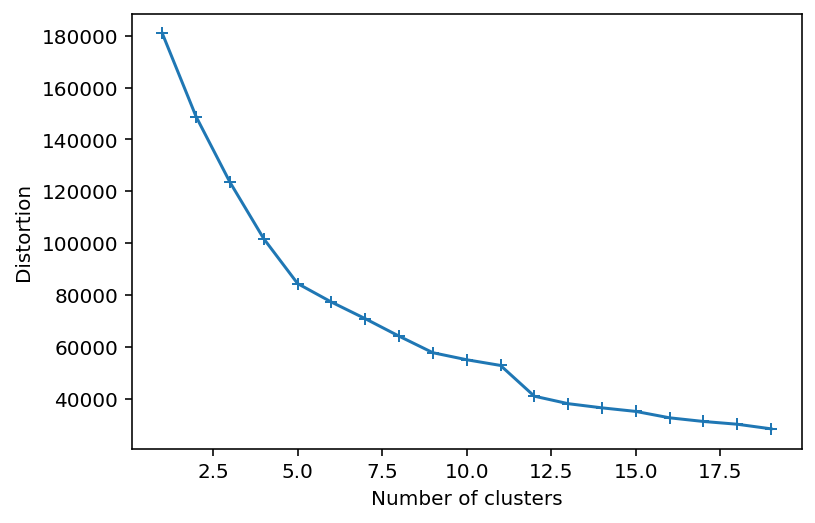

In [19]:
# 엘보우법을 이용한 추정. 군집 수를 1에서 20까지 증가시켜 거리의 종합 계산
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
    
# 그래프 출력
plt.plot(range(1,20), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

make_blobs 함수로 생성한 데이터만큼 분명하지는 않지만, 대략 군집 수 5~6 부근에서 감소폭이 원만해지는 것을 볼 수 있습니다.  
  
엘보우법으로 명확하게 구분되지 않을 경우 실루엣 계수를 산출하거나, 데이터가 생성된 분야에 대한 배겨 ㅇ지식을 바탕으로 변수를 변경하고 다시 엘보우법을 적용하거나, 해석이 가능한 범위의 군집 수로 결정할 수도 있습니다. 

### 군집분석 결과 해석

금융 마케팅 데이터와 앞에서 얻은 군집분석 결과를 결합시킵니다. 원본 데이터의 오른쪽 열에 분류된 군집 번호 cluster_number 변수를 추가합니다.

In [20]:
# 금융기관 데이터에 군집 번호 데이터 결합
bank_with_cluster = pd.concat([bank, labels], axis=1)

# 처음 다섯 행 출력
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


군집별 연령층을 확인해봅니다. 기준 변수는 cluster_number와 age입니다. 연령은 15세부터 5세 단위로 분할해 나가다가 마지막 구간은 65세 이상 100세 미만으로 분할합니다. 

In [21]:
# 구간 분할 간격 설정
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 위의 기준으로 금융기관 데이터를 분할하고, qcut_age 변수에 각 데이터의 연령층 설정
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# 군집 번호와 연령층 결합
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# 군집 번호와 연령층 기준으로 집계하고 연령층을 컬럼으로 설정
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3475,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,170,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [22]:
# 구간 분할한 데이터의 수 세기
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

수치만으로는 파악하기 어렵기 때문에 군집 내의 연령층 비율을 그래프로 나타내보겠습니다.

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

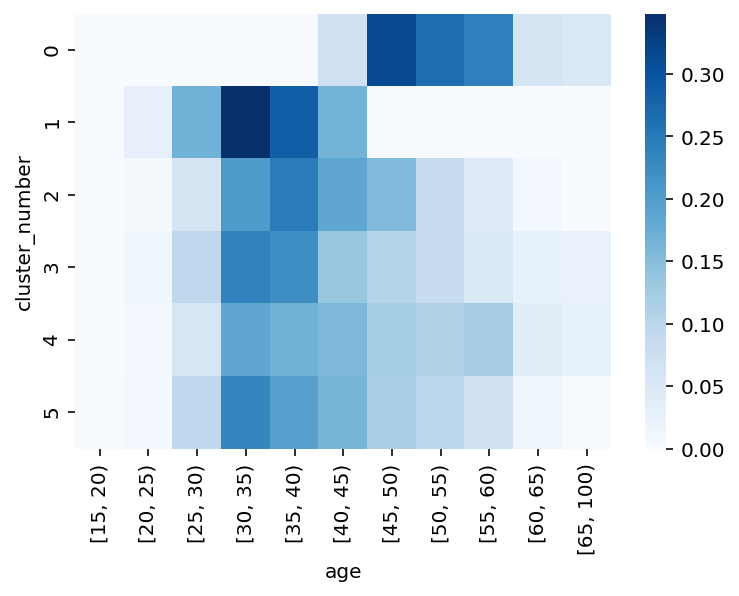

In [23]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

히트맵에서 군집 0은 45-60세 비율이 높은 반면, 군집 1은 30-40세 비중이 높습니다. 이 두 군집은 특정 나이에 치중된 군집이라고 말할 수 있습니다. 

직업을 나타내는 변수를 살펴보겠습니다. job은 age와 다르게 변주형 변수입니다. 우선 군집별로 집계하겠습니다. 

In [24]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1408,2906,528,651,2723,2005,476,1072,3,2048,432,154
1,3005,5385,698,409,4932,55,820,2474,812,4256,687,75
2,392,862,146,108,896,60,139,371,42,701,91,34
3,193,239,42,21,335,53,42,113,53,244,33,5
4,109,175,54,36,417,77,71,69,22,192,49,11
5,64,165,19,15,155,14,31,55,6,156,11,9


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

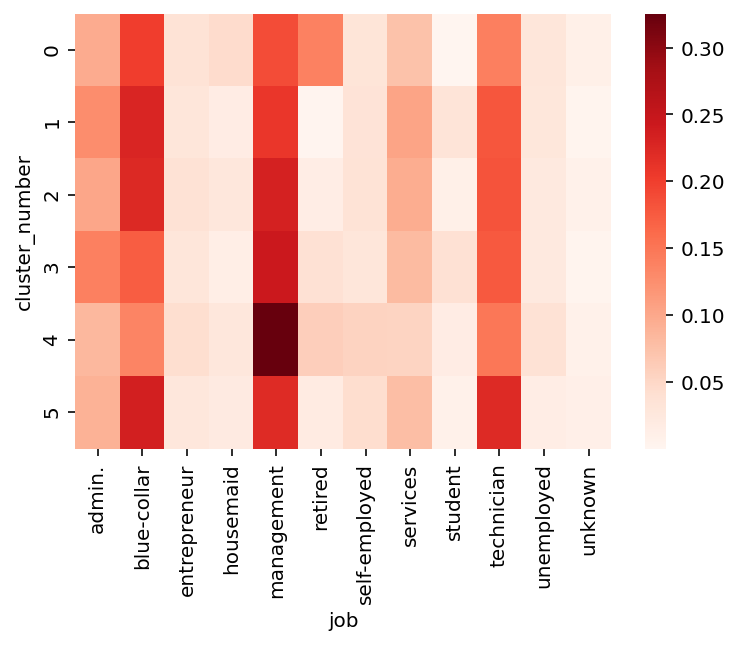

In [25]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1),cmap='Reds')

히트맵을 보면 군집 4는 특별히 management 비율이 높고, 군집 1은 blue-collar 비율이 다소 높다는 것을 알 수 있습니다.  
  
지금까지의 결과를 보면 군집 1은 30-40세 비율이 높고 blue-collar 직군이 약간 많은 그룹으로 해석할 수 있습니다. 